# Pertemuan 3

## Image Smoothing
- Averaging 
- Gaussian Blurring 
- Median Blurring 
- Bilateral Filtering
## Image Thresholding
- Simple Thresholding 
- Adaptive Thresholding 
- Otsu Binarization 

___

### Maximizing Jetson Nano Perfomance
```
sudo nvpmodel -m 0
sudo jetson_clocks
```

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

___
# 1. Image Smoothing
- **Smoothing**, also called **blurring**, is a simple and frequently used image processing operation.
- In this part we will focus on smoothing in order to **reduce noise**.
- To perform a smoothing operation we will apply a **filter** to our image.
- The most common type of filters are **linear**, <br><br>
    $g(i, j) = \sum_{k,l} f(i+k, j+l)h(k,l)$ <br><br>
- where, <br>
    - $h(k,l)$ is a *kernel*, 
    - and $g(i,j)$ is a pixel of linear filter.<br><br>
![](res/blur.gif)<br><br>
![](res/convolution.gif)

## 1.1 2D Convolution (Image Filtering)
- As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc.
- **LPF** helps in **removing noise**, **blurring images**, etc. 
- **HPF** filters help in **finding** edges in images.<br><br>
- OpenCV provides a function `cv2.filter2D(img, kernel)` to convolve a kernel with an image.
    - where : 
        - `img` : input image (numpy array)
        - `ddept` : desired depth of the destination image, 
            - unset : -1 
            - `cv2.CV_8U` : 0
            - `cv2.CV_8UC1` : 1
            - `cv2.CV_8UC2` : 2
            - `cv2.CV_8UC3` : 3
            - etc.
        - `kernel` : convolution kernel, 2D array floating point.<br>
        ![](res/kernel.png)<br><br>
        - As an example, a 5x5 averaging filter kernel will look like the below :<br>
        ![](res/avg_filter.png)

In [ ]:
# load image
img = cv2.imread('noisy_mri.jpg')

# create 5x5 averaging filter kernel
kernel = np.ones((5,5), np.float32)/25

# apply image filtering
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title('Averaging')

plt.show()

## 1.2 Normalized Box Filter 

- Output pixel dari `cv2.blur` merupakan *mean* dari kernel *neighbour*-nya. 
- Kernel yang digunakan sebagai berikut :<br><br>
![](res/kernel.png)<br><br>
- Menggunakan method `cv2.blur(img, ksize, anchor)` 
- dimana :
    - `img` : input image
    - `ksize` : kernel size, contoh (5,5)
    - `anchor` : lokasi titik pixel yang dievaluasi terhadap *neighbour*-nya, jika negative, maka titik nya berada di pusat kernel.

In [ ]:
# load image
img = cv2.imread('noisy_mri.jpg')


# apply image blur with 5x5 kernel size
blur = cv2.blur(img, (5,5))

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

## 1.3 Gaussian Filter
- Probably the most useful filter (although not the fastest). 
- Gaussian filtering is done by convolving each point in the input array with a **Gaussian kernel** and then summing them all to produce the output array.
- Gaussian blurring is highly effective in **removing Gaussian noise** from an image.
    - **Gaussian noise** occurs as a result of sensor limitations during image acquisition under low-light conditions, which make it difficult for the visible light sensors to efficiently capture details of the scene.<br>
    ![](res/g_noise.png)
- 2D Gaussian can be represented as : <br><br>
$G_{0}(x, y) = A e^{ \dfrac{ -(x - \mu_{x})^{2} }{ 2\sigma^{2}_{x} } + \dfrac{ -(y - \mu_{y})^{2} }{ 2\sigma^{2}_{y} } }$
<br><br>
- where $μ$ is the mean (the peak) and $σ2$ represents the variance (per each of the variables $x$ and $y$)
- Distribution plot for $\sigma_{x}$=1.0 : <br>
![](res/2d_g_dist.png)<br><br>
- Example of 5x5 Gaussian Kernel with $\sigma_{x}$=1.0 : <br>
![](res/g_kernel.png)<br><br>
- Applying Gaussian kernel to image, <br>
![](res/g_kernel_il.png)<br><br>
- In OpenCV we can use function `cv2.GaussianBlur(img, ksize, sigmaX, sigmaY)` 
- where :
    - `img` : input image
    - `ksize(w,h)` : kernel size, $w$ and $h$ have to be odd and positive numbers otherwise the siz
    - `sigmaX` : std for *x*, jika di set 0, maka $\sigma_{x}$ dihitung menggunakan kernel size,
    - `sigmaY` : std for *y*, jika di set 0, maka $\sigma_{y}$ dihitung menggunakan kernel size,

In [ ]:
# load image
img = cv2.imread('noisy_jet.png')


# apply image blur with 7x7 kernel size
blur = cv2.blur(img, (7,7))

# apply gaussian blur with 7x7 kernel size
g_blur = cv2.GaussianBlur(img, (7,7), 0, 0)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(blur)
plt.title('Blurred')

plt.subplot(1, 3, 3)
plt.imshow(g_blur)
plt.title('Gaussian Blur')

plt.show()

## 1.3 Median Blur
- Median Blur will find **median of all the pixels under the kernel area** and the **central element is replaced** with this median value. 
- This is highly effective against **salt-and-pepper noise** in an image. 
    - **Salt-and-pepper noise** is a form of noise sometimes seen on images. 
    - It is also known as **impulse noise**. 
    - This noise can be caused by **sharp** and **sudden disturbances** in the image signal. 
    - It presents itself as **sparsely** occurring **white** and **black** pixels.<br>
    ![](res/salt_and_pepper_noise.png)<br><br>
- In OpenCV we can use function `cv2.medianBlur(img, ksize)` 
- where :
    - `img` : input image
    - `ksize` : aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

In [ ]:
# load image
img = cv2.imread('noisy_mri.jpg')


# apply image blur with 7x7 kernel size
blur = cv2.blur(img, (7,7))

# apply median blur with 7x7 kernel size
m_blur = cv2.medianBlur(img, 7) 

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(blur)
plt.title('Blurred')

plt.subplot(1, 3, 3)
plt.imshow(m_blur)
plt.title('Median Blur')

plt.show()

## 1.4 Bilateral Filtering
- Bilateral Filtering highly effective in **noise removal** while **keeping edges sharp**.
- But the operation is **slower** compared to other filters. 
- If we take a look into the **Gaussian filter** , 
    - nearby pixels are considered while filtering. 
    - It doesn't consider whether pixels have almost the same intensity. 
    - It doesn't consider whether a pixel is an edge pixel or not. 
    - So it blurs the edges also, which we don't want to do.<br><br>
- **Bilateral filtering** also use **Gaussian filter** inside operation,
    - When a Gaussian Kernel applying into area that have a **pixel difference**, 
        - Bilateral Filter makes sure that **only nearby pixels** are considered for blurring, 
    - When a Gaussian Kernel applying into area that have a **intensity difference**,
        - Bilateral Filter makes sure that **only those pixels with similar intensities to the central pixel** are considered for blurring. 
    - So it preserves the **edges** since **pixels at edges will have large intensity variation**.<br><br>
- Applying Bilateral Filtering to Image, <br>
<img src="res/b_kernel_il.png" width="700"></img><br><br>
- Ilustration of Bilateral Filter preserves the edge,<br>
<img src="res/b_graph.png" width="600"></img><br><br>

- In OpenCV we can use function `cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)` 
- where :
    - `img` : input image
    - `d` : Diameter of each pixel neighborhood that is used during filtering. 
        - If it is **non-positive**, it is computed from sigmaSpace.
    - `sigmaColor` : Filter sigma in the color space. 
        - A larger value of the parameter means that **farther colors** within the **pixel neighborhood** will be mixed together, resulting in larger areas of semi-equal color.
        - `sigmaColor` ~ mean or median of image gradients
    - `sigmaSpace` : Filter sigma in the coordinate space. 
        - A larger value of the parameter means that **farther pixels** will influence each other as long as their **colors are close enough**. 
        - `sigmaSpace` ~ e.g., 2% of image diagonal

In [ ]:
# load image
img = cv2.imread('face_with_spot.png')

# apply gaussian blur with 7x7 kernel size
g_blur = cv2.GaussianBlur(img, (7,7), 0, 0)

# apply bilateral filter 
h, w, c = img.shape
sigmaColor = int(np.mean(img)/2)
sigmaSpace = int(0.02* np.sqrt(h**2 + w**2))

b_filter = cv2.bilateralFilter(img, -1, sigmaColor, sigmaSpace)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(g_blur[:,:,::-1])
plt.title('Gaussian Blur')

plt.subplot(1, 3, 3)
plt.imshow(b_filter[:,:,::-1])
plt.title('Bilateral Filter σs (%d), σr (%d)' % (sigmaSpace, sigmaColor))

plt.show()

___
## 1.5 CUDA Image Blurring/Smoothing
### 1.5.1 CUDA Normalized Box Filter
- Creating CUDA Box Filter Object `cv2.cuda.createBoxFilter(srcType, dstType, ksize)`
- Where : 
    - `srcType` : Input image type. Only `cv2.CV_8UC1`, `cv2.CV_8UC4` and `cv2.CV_32FC1` are supported for now.
    - `dstType` : Output image type. Only the same type as src is supported for now.
    - `ksize` : Kernel size (tuple).
- Apply CUDA Box Filter by method `.apply(src, dst)` : 
    - where : 
        - `src` : source image
        - `dst` : destination image

### 1.5.2 CUDA Gaussian Filter
- Creating CUDA Gaussian Filter Object `cv2.cuda.createGaussianFilter(srcType, dstType, ksize, sigmaX, sigmaY )`
- Where : 
    - `srcType` : Input image type. Only `cv2.CV_8UC1`, `cv2.CV_8UC4` and `cv2.CV_32FC1` are supported for now.
    - `dstType` : Output image type. Only the same type as src is supported for now.
    - `ksize` : Kernel size (tuple).
    - `sigmaX` : std for *x*, jika di set 0, maka $\sigma_{x}$ dihitung menggunakan kernel size,
    - `sigmaY` : std for *y*, jika di set 0, maka $\sigma_{y}$ dihitung menggunakan kernel size,
- Apply CUDA Gaussian Filter by method `.apply(src, dst)` : 
    - where : 
        - `src` : source image
        - `dst` : destination image

### 1.5.3 CUDA Median Filter
- Creating CUDA Median Filter Object `cv2.cuda.createMedianFilter(srcType, ksize, partition)`
- Where : 
    - `srcType` : Input image type. Only `cv2.CV_8UC1`, `cv2.CV_8UC4` and `cv2.CV_32FC1` are supported for now.
    - `ksize` : Kernel size (int single value).
    - `partition` : Specifies the parallel granularity of the workload. This parameter should be used GPU experts when optimizing performance. (default 128)

- Apply CUDA Median Filter by method `.apply(src, dst)` : 
    - where : 
        - `src` : source image
        - `dst` : destination image

### 1.5.4 CUDA Bilateral Filter
- Creating CUDA Bilateral Filter Object `cv2.cuda.bilateralFilter(src, ksize, sigma_color, sigma_spatial, dst)`
- Where : 
    - `src` : Source image. 
    - `ksize` : Kernel size (int single value).
    - `sigma_color` : Filter sigma in the color space.
	- `sigma_spatial` :	Filter sigma in the coordinate space.
    - `dst` : Destination Image.
	- Output is image.

In [ ]:
# CUDA Averaging Filter vs CUDA Gaussian Filter vs CUDA Median Filter vs CUDA Bilateral Filter

img = cv2.imread("face_with_spot.png")
# gaussian noise (gaussian filter) : noisy_jet.png
# salt-and-pappered noise (median filter) : noisy_mri.jpg
# noise removal + edge sharp (bilateral filter) : face_with_spot.png

# CUDA Initialization
h, w = img.shape[:2]
sigmaColor = int(np.mean(img)/2)
sigmaSpace = int(0.02* np.sqrt(h**2 + w**2))

img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
gray_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
gray_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_box_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_box_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_Gaussian_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_Gaussian_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_median_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_median_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
res_bilateral_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
res_bilateral_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel

# Create CUDA Gaussian Filter Object with kernel size 7x7
cuda_GaussianFilter = cv2.cuda.createGaussianFilter(cv2.CV_8UC1, cv2.CV_8UC1, (7,7), 0, 0)
# Create CUDA Box Filter Object with kernel size 7x7
cuda_boxFilter = cv2.cuda.createBoxFilter(cv2.CV_8UC1, cv2.CV_8UC1, (7,7))
# Create CUDA Median Filter
cuda_medianFilter = cv2.cuda.createMedianFilter(cv2.CV_8UC1, 7, 128)

# Upload to GPU Memory
img_GpuMat.upload(img)

# apply CUDA grayscaling
cv2.cuda.cvtColor(img_GpuMat, cv2.COLOR_BGR2GRAY, gray_GpuMat)

# apply CUDA Gaussian Filter
cuda_GaussianFilter.apply(gray_GpuMat, res_Gaussian_GpuMat)
# apply CUDA box Filter
cuda_boxFilter.apply(gray_GpuMat, res_box_GpuMat)
# apply CUDA Median Filter
cuda_medianFilter.apply(gray_GpuMat, res_median_GpuMat)
# apply CUDA Bilateral Filter
cv2.cuda.bilateralFilter(img_GpuMat, -1, sigmaColor, sigmaSpace, res_bilateral_GpuMat)

# Download to Host Memory
res_Gaussian_img = res_Gaussian_GpuMat.download()
res_box_img = res_box_GpuMat.download()
res_median_img = res_median_GpuMat.download()
res_bilateral_img = res_bilateral_GpuMat.download()

# display result
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(res_box_img, cmap="gray")
plt.title('CUDA Normalized Box Filter')

plt.subplot(2, 4, 3)
plt.imshow(res_Gaussian_img, cmap="gray")
plt.title('CUDA Gaussian Filter')

plt.subplot(2, 4, 4)
plt.imshow(res_median_img, cmap="gray")
plt.title('CUDA Median Filter')

plt.subplot(2, 4, 5)
plt.imshow(res_bilateral_img[:,:,::-1])
plt.title('CUDA Bilateral Filter')

plt.show()


___
# 2. Image Thresholding 
## 2.1 Simple Thresholding (Image Binarization)

- **Image Binarization** adalah proses membuat sebuah gambar menjadi hitam putih (image hanya memiliki nilai pixel 0 atau 255) dengan menerapkan batas threshold tertentu. 
    
- Menggunakan method `cv2.threshold(img, threshold_value, max_value, threshold_type)`
- Untuk :
    - `img` : input image
    - `threshold_value`: The thresh value with respect to which the thresholding operation is made
    - `max_value`: The value used with the Binary thresholding operations (to set the chosen pixels)
    - `threshold_type`: One of the 5 thresholding operations. 
        - `cv2.THRESH_BINARY`
        - `cv2.THRESH_BINARY_INV`
        - `cv2.THRESH_TRUNC`
        - `cv2.THRESH_TOZERO`
        - `cv2.THRESH_TOZERO_INV`
    
    
- Ilustrasi : \
![](res/thresh.png)


In [59]:
# example : Simple Thresholding

max_value = 255
default_value = 100

# load image
img = cv2.imread('Tomat.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show original image
plt.figure(figsize=(15,7))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(gray, cmap="gray")


THRESH_FLAGS = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
NAMES = ["Thresholded Binary", "Thresholded Binary Inv", "Thresholded Trunc", "Thresholded To Zero", "Thresholded To Zero Inv"]

for i in range(5):
    # apply simple thresholding
    __, thresh = cv2.threshold(gray, default_value, max_value, THRESH_FLAGS[i])

    # show thresholding result
    plt.subplot(2, 3, i+2)
    plt.title(NAMES[i])
    plt.imshow(thresh, cmap="gray")



___
## 2.2 Adaptive Thresholding
- In the previous section, we used **one global value** as a threshold. 
- But this might not be good in all cases, e.g. if **an image has different lighting conditions in different areas**.
- In that case, **adaptive thresholding** can help.
- Here, the algorithm determines the threshold for **a pixel based on a small region around it**. 
- So we get **different thresholds** for **different regions** of the **same image** which gives **better results for images with varying illumination**.<br><br>
![](res/at.jpg)<br><br>
- The method `cv2.adaptiveThreshold(img, max_value, adaptive_method, threshold_type, blockSize, C)` :
    - where : 
        - `img` : input image (numpy array)
        - `max_value` : The value used with the Binary thresholding operations (to set the chosen pixels)
        - `adaptive_method` : 
            - `cv2.ADAPTIVE_THRESH_MEAN_C` : The threshold value is the mean of the neighbourhood area minus the constant `C`.
            - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant `C`.
        - `threshold_type`: that must be either : 
            - `cv2.THRESH_BINARY`
            - `cv2.THRESH_BINARY_INV`  
        - `blockSize` : Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
        - `C` : Constant subtracted from the `mean` or `weighted mean`. Normally, it is positive but may be zero or negative as well.

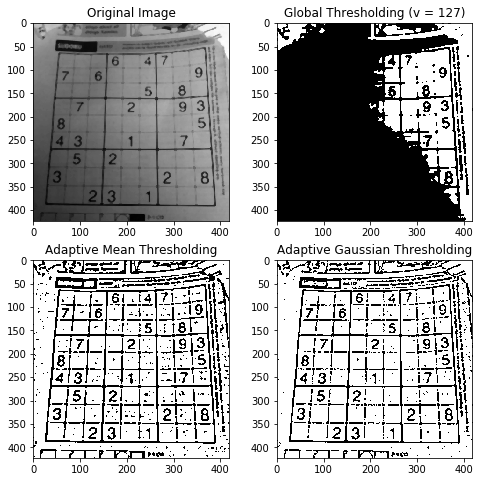

In [55]:
# load image
img = cv2.imread('sudoku.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply median blur
gray = cv2.medianBlur(gray, 5)

# show original image
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(gray, cmap="gray")

# apply thresholding
__, tresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
tresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
tresh3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

NAMES = ['Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [tresh1, tresh2, tresh3]

for i in range(3):
    plt.subplot(2, 2, i+2)
    plt.title(NAMES[i])
    plt.imshow(images[i],'gray')

___
## 2.3 Otsu's Binarization

- In global thresholding, we used an arbitrary chosen value as a threshold. 
- In contrast, Otsu's method avoids having to choose a value and determines it automatically.<br><br>
<img src="res/otsu.png" style="width:900px;"></img><br><br>
- Consider an image with only two distinct image values (bimodal image), where the histogram would only consist of two peaks. 
- A good threshold would be in the middle of those two values.<br><br>
<img src="res/otsu_graph.gif" style="width:500px;"></img><br><br>
- Similarly, Otsu's method determines an optimal global threshold value from the image histogram.<br><br>
- To use Otsu's method, we can use `cv2.threshold()` with `threshold_type` : 
    - `cv2.THRESH_OTSU`


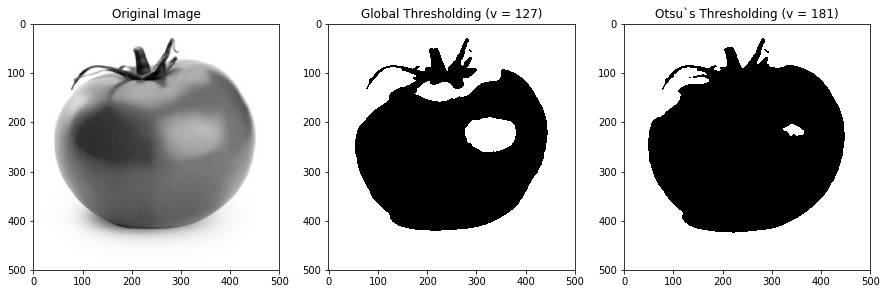

In [58]:
# load image
img = cv2.imread('Tomat.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply median blur
gray = cv2.medianBlur(gray, 5)

# show original image
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray, cmap="gray")

# apply thresholding
__, tresh1 = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
value, tresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

NAMES = ['Global Thresholding (v = 127)', 'Otsu`s Thresholding (v = %d)' % value]

images = [tresh1, tresh2]

for i in range(2):
    plt.subplot(1, 3, i+2)
    plt.title(NAMES[i])
    plt.imshow(images[i],'gray')

## 2.4 CUDA Thresholding
### 2.4.1 CUDA Simple Thresholding
- Function for CUDA Simple Thresholding `cv2.threshold(src, thresh, maxval, threshold_type, dst)`
- Where :
    - `img` : input image
    - `threshold_value`: The thresh value with respect to which the thresholding operation is made
    - `max_value`: The value used with the Binary thresholding operations (to set the chosen pixels)
    - `threshold_type`: One of the 5 thresholding operations. 
        - `cv2.THRESH_BINARY`
        - `cv2.THRESH_BINARY_INV`
        - `cv2.THRESH_TRUNC`
        - `cv2.THRESH_TOZERO`
        - `cv2.THRESH_TOZERO_INV`
        - The `cv2.THRESH_OTSU` not supported!!
    - `dst` : destination image

In [ ]:
# example : CUDA Simple Thresholding

# Initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
gray_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
gray_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
bin_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
bin_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
bin_inv_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
bin_inv_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
trunc_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
trunc_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
tzero_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
tzero_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
tzero_inv_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
tzero_inv_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel

# parameters
max_value = 255
default_value = 230

# load image
img = cv2.imread('Tomat.jpg')

# show original image
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img[:,:,::-1])

# Upload to GPU Memory
img_GpuMat.upload(img)

# apply CUDA grayscaling
cv2.cuda.cvtColor(img_GpuMat, cv2.COLOR_BGR2GRAY, gray_GpuMat)

THRESH_FLAGS = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
NAMES = ["CUDA Thresholded Binary", "CUDA Thresholded Binary Inv", "CUDA Thresholded Trunc", "CUDA Thresholded To Zero", "CUDA Thresholded To Zero Inv"]
thresh_GpuMat_list = [bin_GpuMat, bin_inv_GpuMat, trunc_GpuMat, tzero_GpuMat, tzero_inv_GpuMat]

for i in range(5):
    # apply simple thresholding
    cv2.cuda.threshold(gray_GpuMat, default_value, max_value, THRESH_FLAGS[i], thresh_GpuMat_list[i])

for i in range(5):
    thresh = thresh_GpuMat_list[i].download()
    # show thresholding result
    plt.subplot(2, 3, i+2)
    plt.title(NAMES[i])
    plt.imshow(thresh, cmap="gray")

# Source : 
- https://docs.opencv.org/4.5.1/d4/d13/tutorial_py_filtering.html
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm
- https://www.vision-systems.com/home/article/14174546/filtering-techniques-eliminate-gaussian-image-noise
- http://people.csail.mit.edu/sparis/bf_course/slides/03_definition_bf.pdf
- https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html